In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [4]:
bank= pd.read_csv("bank-full.csv",sep=';')

In [5]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
bank.shape

(45211, 17)

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
bank.drop(["marital","default","contact"],inplace=True,axis = 1)

In [10]:
bank.head()

,age,job,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,2143,yes,no,5,may,261,1,-1,0,unknown,no
1,44,technician,secondary,29,yes,no,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,secondary,2,yes,yes,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,unknown,1506,yes,no,5,may,92,1,-1,0,unknown,no
4,33,unknown,unknown,1,no,no,5,may,198,1,-1,0,unknown,no


In [11]:
bank.shape

(45211, 14)

<AxesSubplot:xlabel='job', ylabel='count'>

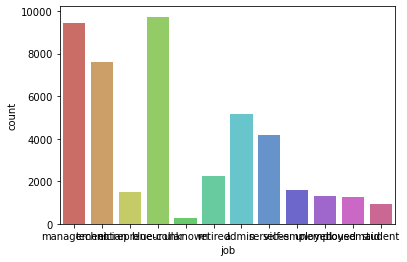

In [19]:
sn.countplot(x="job",data=bank,palette="hls")

<AxesSubplot:xlabel='job'>

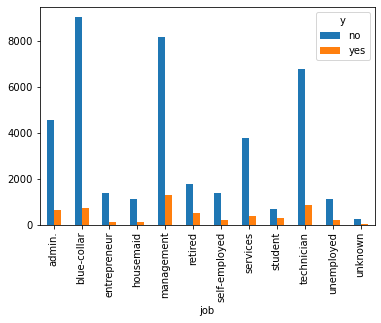

In [20]:
pd.crosstab(bank.job,bank.y).plot(kind="bar")

<AxesSubplot:xlabel='education'>

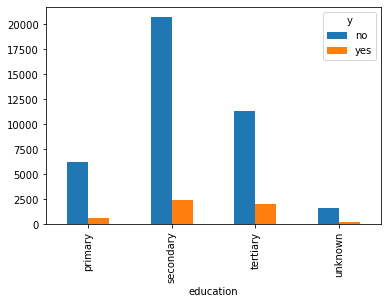

In [21]:
pd.crosstab(bank.education,bank.y).plot(kind="bar")

<AxesSubplot:xlabel='housing'>

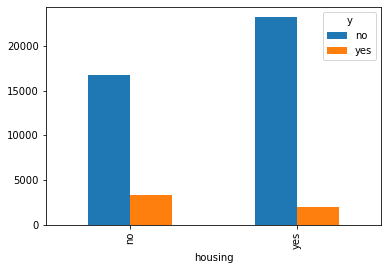

In [22]:
pd.crosstab(bank.housing,bank.y).plot(kind="bar")

<AxesSubplot:xlabel='loan'>

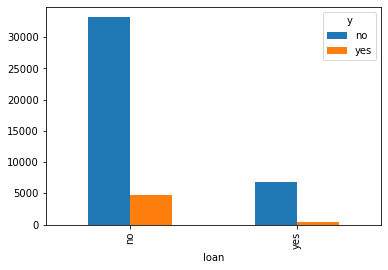

In [23]:
pd.crosstab(bank.loan,bank.y).plot(kind="bar")

<AxesSubplot:xlabel='month'>

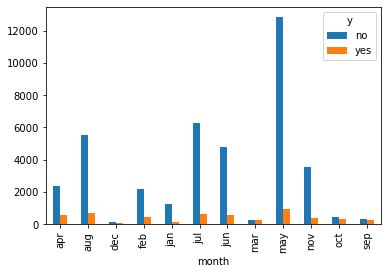

In [24]:
pd.crosstab(bank.month,bank.y).plot(kind="bar")

<AxesSubplot:xlabel='poutcome'>

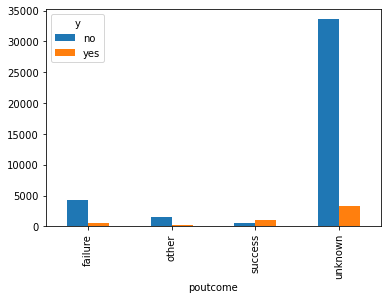

In [25]:
pd.crosstab(bank.poutcome,bank.y).plot(kind="bar")

In [27]:
bank.isnull().sum()

age          0
job          0
education    0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [28]:
bank["job"].value_counts()


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [46]:
bank["housing"].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [47]:
bank["loan"].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [41]:
 bank1=pd.get_dummies(bank,columns = ['job','education','housing','loan','month','poutcome','y'])

In [42]:
bank1

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,1,0,0,0,0,1,0,0,1
45209,57,668,17,508,4,-1,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0


In [43]:
bank1.shape

(45211, 45)

In [44]:
bank.value_counts()

age  job         education  balance  housing  loan  day  month  duration  campaign  pdays  previous  poutcome  y  
95   retired     secondary  0        no       no    1    oct    215       1         -1     0         unknown   no     1
34   unknown     unknown    164      no       no    4    aug    119       2         -1     0         unknown   no     1
35   admin.      secondary  91       yes      no    23   may    185       4         -1     0         unknown   no     1
                            76       no       yes   17   jun    107       1         -1     0         unknown   no     1
                            69       yes      yes   6    may    235       2         -1     0         unknown   no     1
                                                                                                                     ..
45   management  secondary  237      yes      no    21   nov    526       1         -1     0         unknown   no     1
                            142      no      

In [48]:
bank1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'y_no', 'y_yes'],
      dtype='object')

In [49]:
bank1.drop(["housing_yes","loan_yes","y_yes"],inplace=True,axis = 1)

In [50]:
bank1.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no
0,58,2143,5,261,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1


In [51]:
bank1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'housing_no', 'loan_no', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_no'],
      dtype='object')

In [52]:
from sklearn.linear_model import LogisticRegression

In [54]:
X = bank1[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'housing_no', 'loan_no', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown']]
Y = bank1['y_no']

In [55]:
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\Sagar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
classifier.coef_

array([[ 2.83060636e-02, -7.09652636e-06, -4.36316561e-03,
        -3.16857509e-03,  3.19210365e-01, -1.50958111e-03,
         1.01509420e-01,  3.96903506e-02,  3.65263653e-01,
         3.97466033e-02,  1.24512924e-02, -4.37577599e-03,
        -2.39809805e-01,  2.37352935e-02,  1.28729324e-01,
        -4.40558951e-02,  9.87669120e-02, -4.45845944e-03,
        -3.55949171e-03,  1.02328420e-01,  3.85003516e-01,
        -5.69161161e-02, -1.82918184e-02, -5.74593892e-01,
         1.13375146e-01, -5.80328898e-02, -4.41849371e-02,
        -4.14445704e-02,  1.77617178e-02,  1.81928668e-02,
         1.12886287e-01,  9.11963172e-02, -1.25178036e-01,
         6.09686729e-01,  8.04249327e-02, -1.41919472e-01,
        -1.07264945e-01,  1.92143774e-01,  4.33703857e-02,
        -4.47031331e-01,  6.23641172e-01]])

In [59]:
classifier.predict_proba (X)

array([[0.0575387 , 0.9424613 ],
       [0.03528551, 0.96471449],
       [0.04468376, 0.95531624],
       ...,
       [0.57329713, 0.42670287],
       [0.06859102, 0.93140898],
       [0.14443444, 0.85556556]])

In [60]:
y_pred = classifier.predict(X)

In [77]:
y_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=uint8)

In [85]:
y_pred_df= pd.DataFrame({'actual': bank1['y_no'],
                         'predicted_prob': classifier.predict(X)})

In [86]:
y_pred_df

,actual,predicted_prob
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
45206,0,0
45207,0,1
45208,0,0
45209,1,1


In [62]:
bank["y_pred"] = y_pred

In [63]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))

In [64]:
new_df = pd.concat([bank,y_prob],axis=1)

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[ 1046  4243]
 [  671 39251]]


In [67]:
type(y_pred)

numpy.ndarray

In [69]:
accuracy = sum(Y==y_pred)/bank.shape[0]

In [70]:
pd.crosstab(y_pred,Y)


y_no,0,1
row_0,,
0,1046,671
1,4243,39251


In [82]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

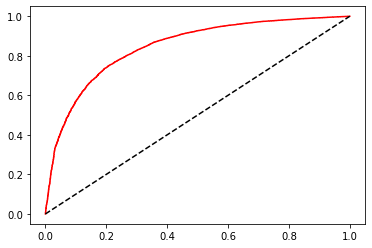

In [87]:
fpr, tpr, thresholds = roc_curve(bank1['y_no'], classifier.predict_proba (X)[:,1])
auc = roc_auc_score(bank1['y_no'], y_pred)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')